<a href="https://colab.research.google.com/github/Affan75/Affan75/blob/main/SVM_Assignments__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('mushroom.csv')
df.head()



,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
label_encoder = LabelEncoder()

column_to_encode = 'category'
if column_to_encode in df.columns:
    df[column_to_encode + '_encoded'] = label_encoder.fit_transform(df[column_to_encode])
else:
    print(f"Column '{column_to_encode}' not found in the dataframe.")

print(df.head())


Column 'category' not found in the dataframe.
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   r

In [ ]:
print(df.dtypes)


Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
print(df.dtypes)


Unnamed: 0                    int64
cap_shape                     int64
cap_surface                   int64
cap_color                     int64
bruises                       int64
odor                          int64
gill_attachment               int64
gill_spacing                  int64
gill_size                     int64
gill_color                    int64
stalk_shape                   int64
stalk_root                    int64
stalk_surface_above_ring      int64
stalk_surface_below_ring      int64
stalk_color_above_ring        int64
stalk_color_below_ring        int64
veil_type                     int64
veil_color                    int64
ring_number                   int64
ring_type                     int64
spore_print_color             int64
population                    int64
habitat                       int64
class                         int64
stalk_height                float64
cap_diameter                float64
dtype: object


In [ ]:
null_values = df.isnull()
null_values

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_count = null_values.sum()
null_count

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
df.shape

(2000, 26)

In [ ]:
df.size

52000

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   int64  
 2   cap_surface               2000 non-null   int64  
 3   cap_color                 2000 non-null   int64  
 4   bruises                   2000 non-null   int64  
 5   odor                      2000 non-null   int64  
 6   gill_attachment           2000 non-null   int64  
 7   gill_spacing              2000 non-null   int64  
 8   gill_size                 2000 non-null   int64  
 9   gill_color                2000 non-null   int64  
 10  stalk_shape               2000 non-null   int64  
 11  stalk_root                2000 non-null   int64  
 12  stalk_surface_above_ring  2000 non-null   int64  
 13  stalk_surface_below_ring  2000 non-null   int64  
 14  stalk_co

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

In [ ]:
df.describe()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,633.275615,2.065574,1.548156,3.924180,0.514344,3.965164,1.534836,0.997951,0.510246,5.445697,...,0.512295,1.481557,0.960041,3.585041,3.973361,2.427254,3.065574,0.633197,8.524684,12.598566
std,372.262936,1.432159,1.101857,2.625006,0.500050,2.547762,1.121727,0.813978,0.500151,3.385205,...,0.500105,1.114781,0.812367,2.296696,2.627528,1.712948,1.945884,0.482179,3.703043,6.987077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,306.750000,1.000000,1.000000,2.000000,0.000000,2.000000,0.750000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,5.326820,6.141161
50%,622.500000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.000000,1.000000,5.000000,...,1.000000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,8.367245,12.626094
75%,959.250000,3.000000,2.000000,6.000000,1.000000,6.000000,3.000000,2.000000,1.000000,8.000000,...,1.000000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.758624,18.559780
max,1279.000000,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.000000,1.000000,11.000000,...,1.000000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


In [ ]:
target = df[['class']]
feature = df.drop('class',axis=1)

In [ ]:
target

,class
0,1
1,0
2,1
3,1
4,1
...,...
1985,0
1988,1
1989,0
1996,1


In [ ]:
feature

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,8,0,0,2,6,3,1,5,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,0,1,0,2,6,1,2,5,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,3,1,3,2,6,6,0,5,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,5,0,3,2,0,4,1,0,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,7,1,2,0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,1,1,0,0,4,3,1,0,3,...,8,1,0,0,3,1,2,3,13.020616,9.993008
1988,926,0,1,4,1,1,1,2,0,1,...,5,0,0,2,5,8,2,0,3.751597,18.868135
1989,289,4,3,5,1,1,1,1,1,2,...,6,1,1,2,4,5,0,0,13.134058,15.740028
1996,1160,4,2,5,1,5,0,2,1,9,...,4,0,2,1,7,8,2,5,6.500840,13.501957


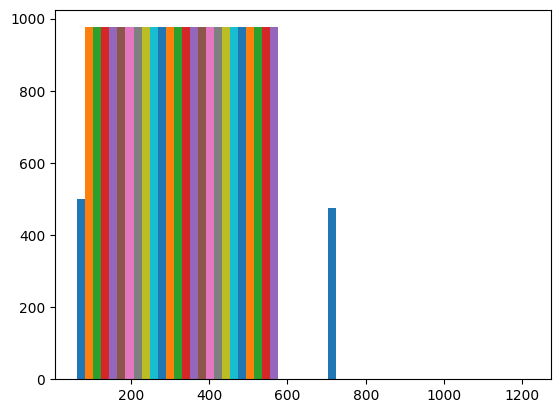

In [ ]:
plt.hist(feature, bins=2)
plt.show()

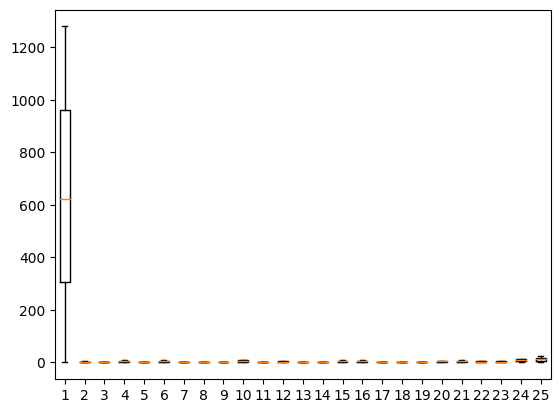

In [ ]:
plt.boxplot(feature)
plt.show()

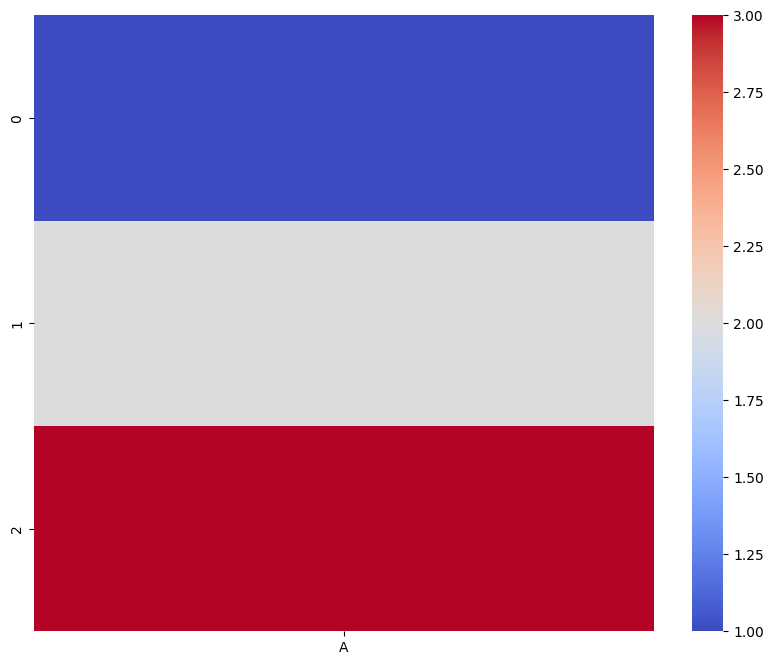

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.DataFrame({
    'A': [1, 2, 3],
    'B': ['x', 'y', 'z'],
    'C': [True, False, True]
})

numeric_columns = df_encoded.select_dtypes(include=['number']).columns
df_numeric = df_encoded[numeric_columns]

df_numeric_encoded = pd.get_dummies(df_numeric)

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric_encoded, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
lab_enc = LabelEncoder()
for col in df_encoded.columns:
  df_encoded[col] = lab_enc.fit_transform(df_encoded[col])
df_encoded.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484


In [ ]:
target = df_encoded['class']
feature = df_encoded.drop('class',axis = 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.75,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 25)
(500, 25)
(1500,)
(500,)


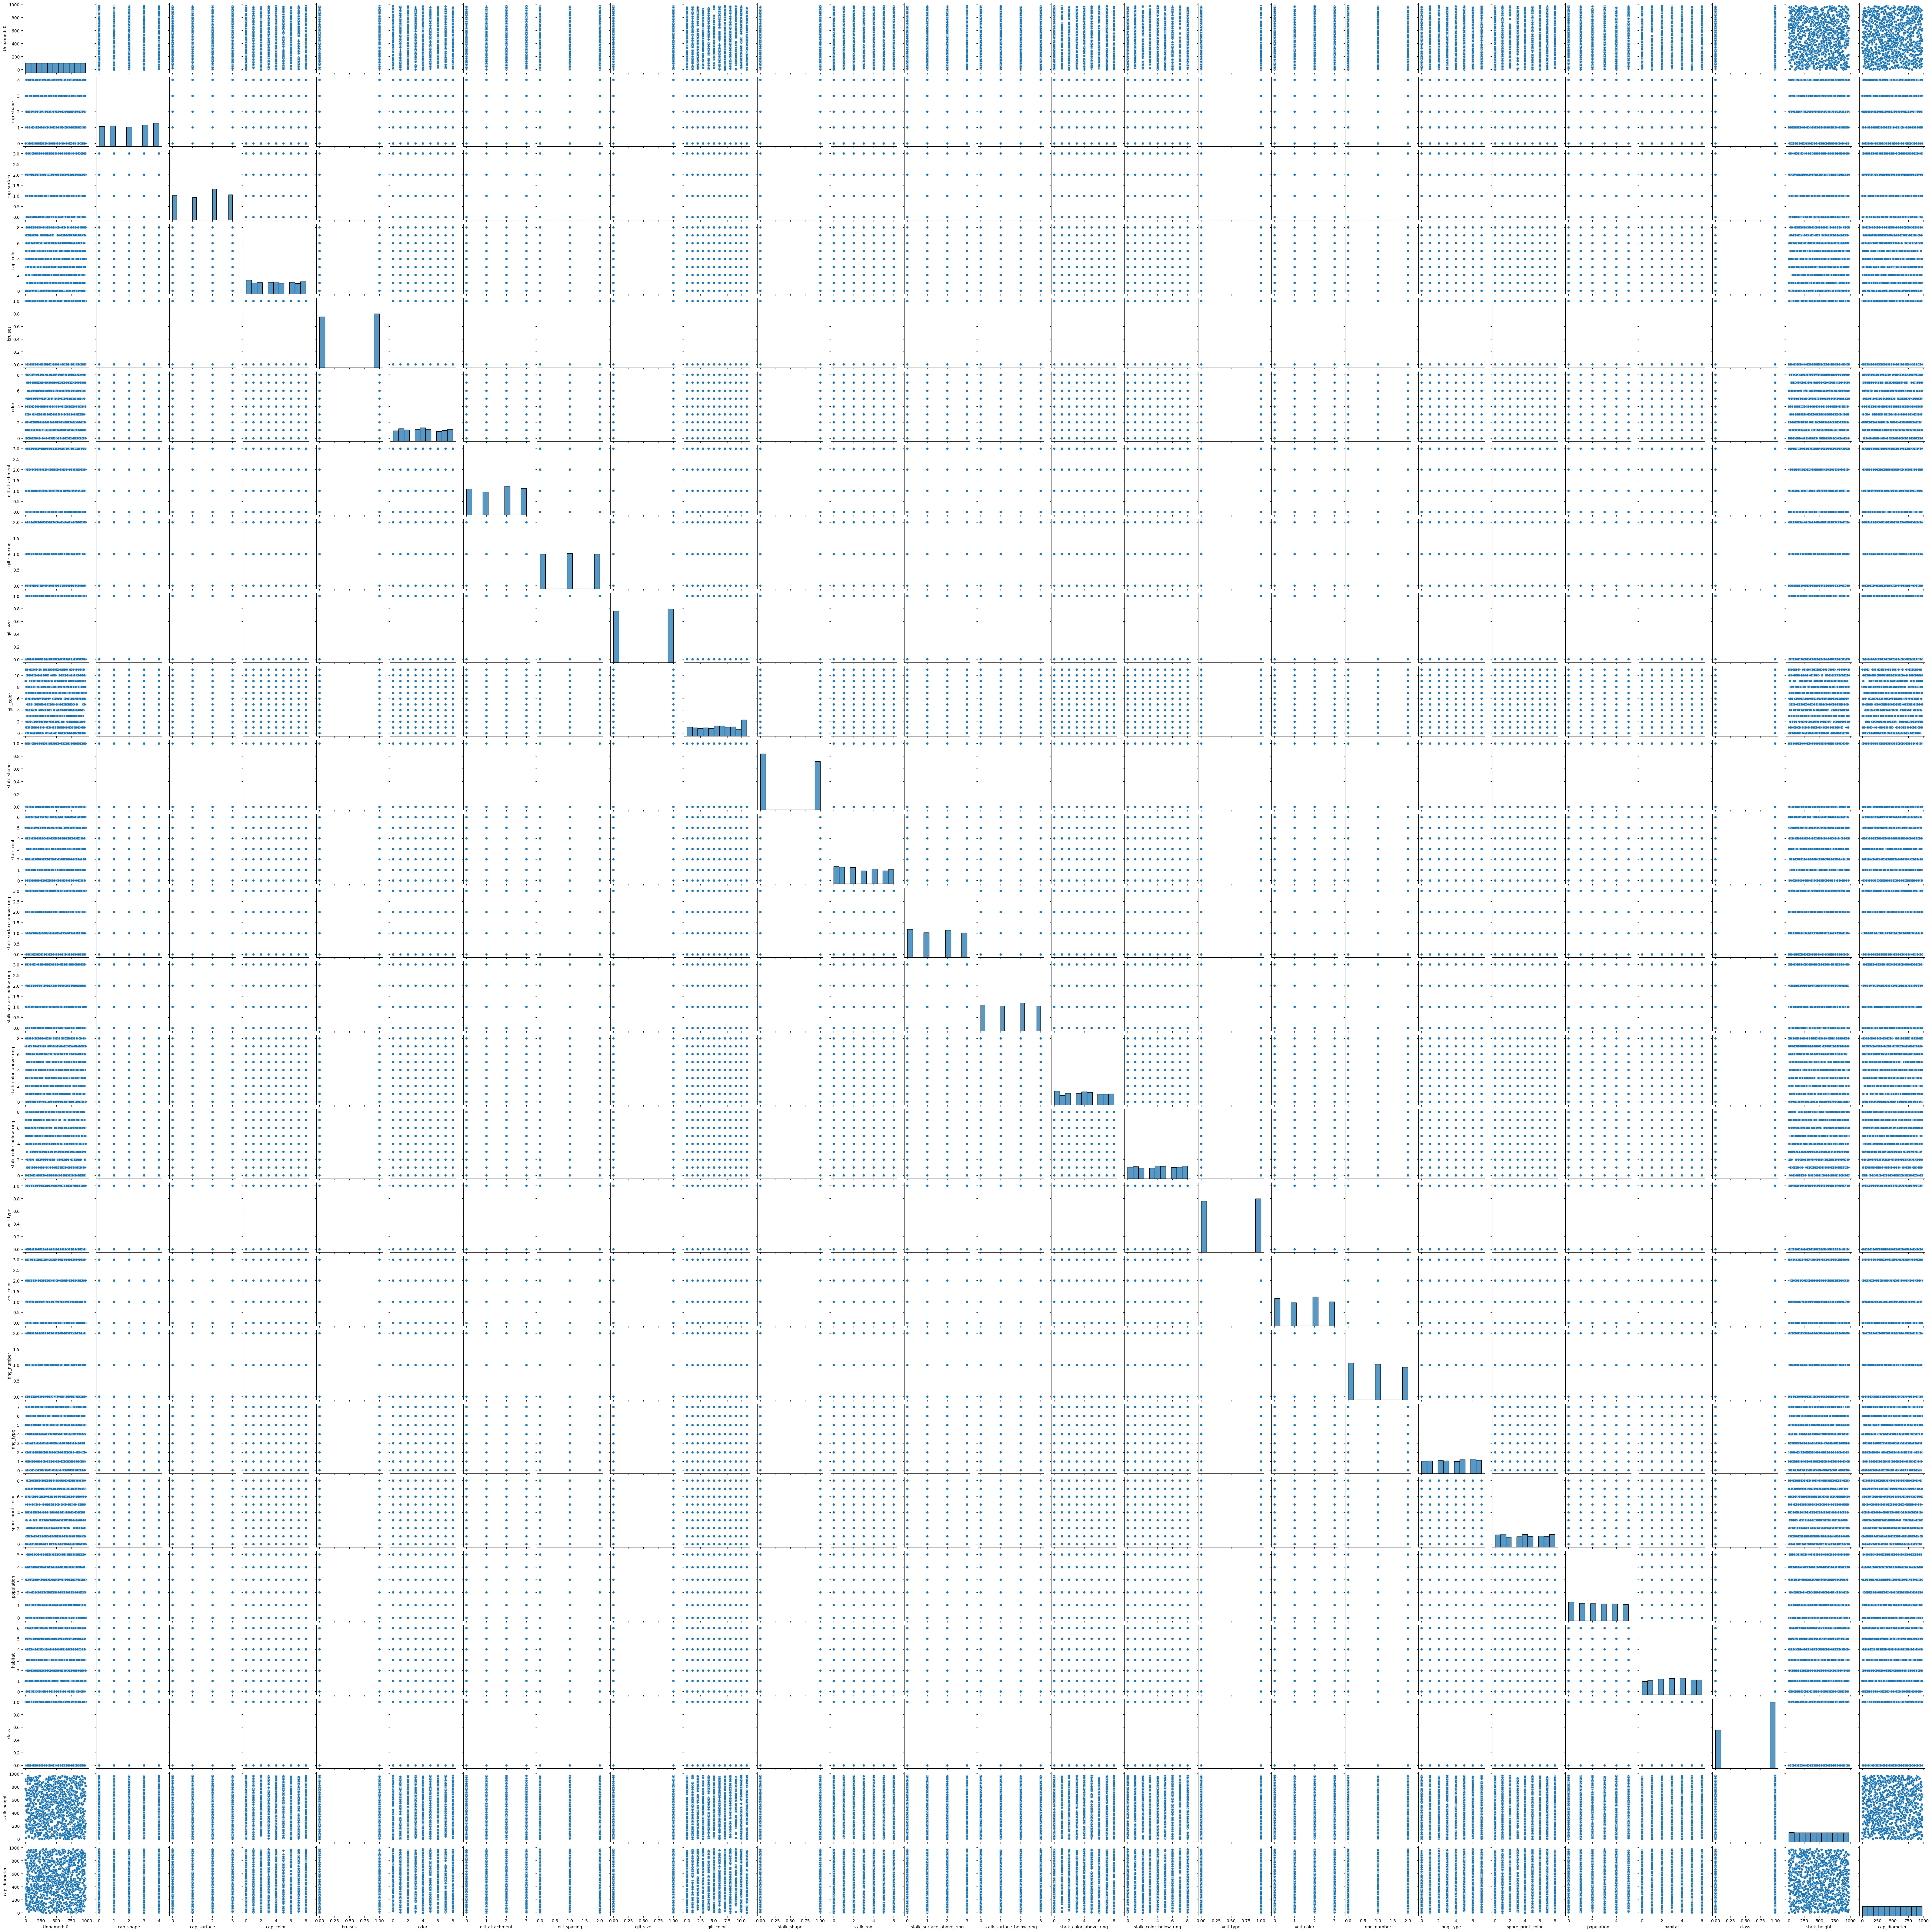

In [ ]:
sns.pairplot(data = df_encoded)

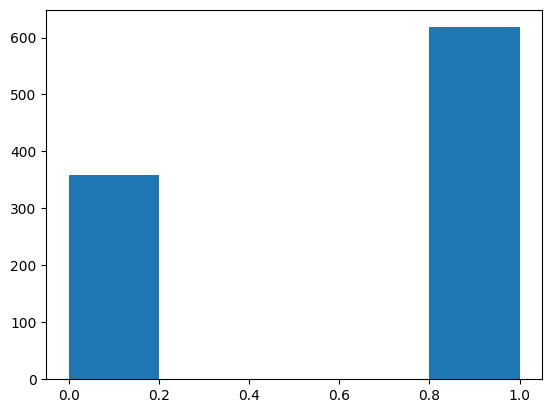

In [ ]:
plt.hist(df['class'],bins = 5)
plt.show()

In [ ]:
svc = SVC(C=1,kernel='linear',gamma=0.1)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.59      1.00      0.74       144

    accuracy                           0.59       244
   macro avg       0.30      0.50      0.37       244
weighted avg       0.35      0.59      0.44       244



<Axes: >

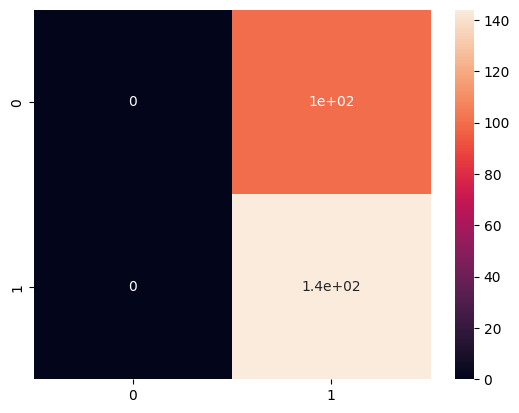

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

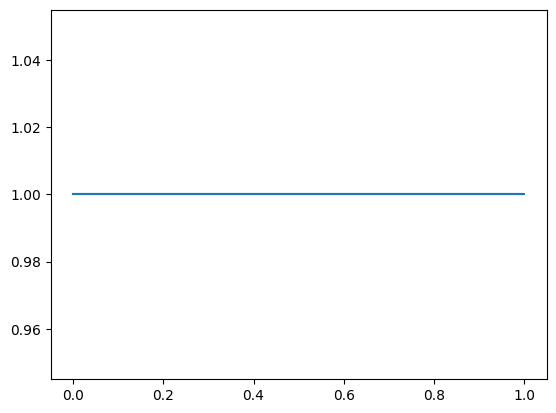

In [ ]:
plt.plot(y_test,y_pred)

In [ ]:
svc_linear = SVC(C=5,kernel='linear',gamma=0.1)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
svc_linear = SVC(C=10,kernel='linear',gamma=0.2)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
svc_linear = SVC(C=15,kernel='linear',gamma=0.3)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
svc_linear = SVC(C=20,kernel='linear',gamma=0.4)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.658

In [ ]:
svc_linear = SVC(C=1,kernel='linear',gamma=0.1)
svc_linear.fit(x_train,y_train)
y_pred = svc_linear.predict(x_test)
accuracy_score(y_test,y_pred)

0.5901639344262295

In [ ]:
svc_poly = SVC(C=1,kernel='poly',gamma=0.1)
svc_poly.fit(x_train,y_train)
y_pred = svc_poly.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
svc_rbf = SVC(C=1,kernel='rbf',gamma=0.1)
svc_rbf.fit(x_train,y_train)
y_pred = svc_rbf.predict(x_test)
accuracy_score(y_test,y_pred)

0.86

In [ ]:
svc_sig = SVC(C=1,kernel='sigmoid',gamma=0.1)
svc_sig.fit(x_train,y_train)
y_pred = svc_sig.predict(x_test)
accuracy_score(y_test,y_pred)

0.658

<Axes: xlabel='class'>

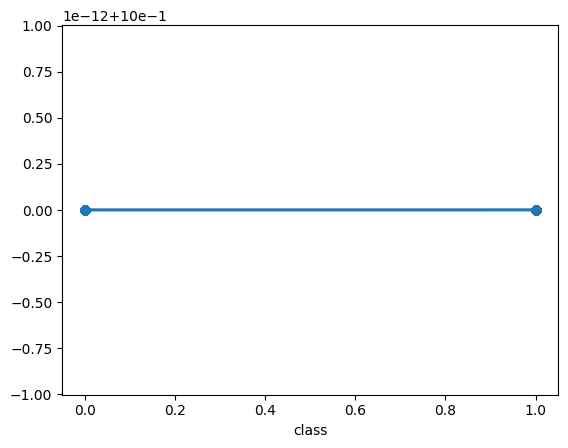

In [ ]:
sns.regplot(data = df_encoded, x=y_test, y=y_pred)